# Імпорти

In [275]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Напишіть функцію гіпотези лінійної регресії у векторному вигляді

In [276]:
def hypothesis(X, w):
    """
    Обчислює значення функції гіпотези для заданої вибірки та вектора ваг.
    
    Args:
    X (np.ndarray): Матриця ознак розмірності (m, n+1), де m - кількість прикладів у вибірці,
                    n - кількість ознак.
    w (np.ndarray): Вектор ваг розмірності (n+1, 1).
    
    Returns:
    np.ndarray: Вектор передбачень розмірності (m, 1).
    """
    return X @ w

# Створіть функцію для обчислення функції втрат у векторному вигляді

In [277]:

def loss_function(X, y, w):
    """
    Обчислює значення функції втрат для заданої вибірки та вектора ваг.
    
    Args:
    X (np.ndarray): Матриця ознак розмірності (m, n+1), де m - кількість прикладів у вибірці,
                    n - кількість ознак.
    y (np.ndarray): Вектор правильних відповідей розмірності (m, ).
    w (np.ndarray): Вектор ваг розмірності (n+1, 1).
    
    Returns:
    float: Значення функції втрат.
    """
    m = X.shape[0]
    return ((hypothesis(X, w) - y)**2).sum() / (2 * m)

# Реалізуйте один крок градієнтного спуску

In [278]:
def gradient_descent_step(w, grad, learning_rate):
    """
    Обчислює новий вектор ваг на основі останнього вектора ваг та градієнта,
    за допомогою кроку градієнтного спуску з заданою швидкістю навчання.
    
    Args:
    w (np.ndarray): Вектор ваг розмірності (n, 1).
    grad (np.ndarray): Вектор градієнту розмірності (n, 1).
    learning_rate (float): Швидкість навчання.
    
    Returns:
    np.ndarray: Новий вектор ваг розмірності (n, 1).
    """
    return w - learning_rate * grad.reshape(w.shape)

*Функція граієнту*

In [279]:
def gradient(X, y, w):
    """
    Обчислення градієнту функції втрат за лінійної регресії.

    Args:
    X (np.ndarray): Матриця розмірності (m, n+1), де m - кількість прикладів, n - кількість ознак.
    y (np.ndarray): Вектор відповідей розмірності (m, 1).
    w (np.ndarray): Вектор вагів розмірності (n+1, 1).

    Returns:
    np.ndarray: Градієнт функції втрат за вагами розмірності (n+1, 1).
    """
    m = X.shape[0]
    h = hypothesis(X, w)
    grad = X.T @ (h - y)
    return grad / m

# Знайдіть найкращі параметри w для датасету прогнозуючу ціну на будинок залежно від площі, кількості ванних кімнат та кількості спалень

*Завантаження даних*

In [280]:
data = pd.read_csv("/content/sample_data/Housing.csv")

*Вибір колонок для використання*

In [281]:
X = data[["area", "bedrooms", "bathrooms"]].values
y = data["price"].values

*Нормалізація даних*

In [282]:
X_mean = X.mean(axis=0)
X_std = X.std(axis=0)
X_norm = (X - X_mean) / X_std

y_mean = y.mean()
y_std = y.std()
y_norm = (y - y_mean) / y_std

*Початкові значення вагів*

In [283]:
m = X_norm.shape[0]

# Додати стовпець з одиницями до матриці X_norm
X_norm = np.hstack((np.ones((m, 1)), X_norm))

n = X_norm.shape[1] - 1

w = np.zeros((n+1, 1))

*Гіперпараметри*

In [284]:
learning_rate = 0.01
num_iterations = 1000

*Градієнтний спуск*

In [285]:
best_loss = float('inf')
best_weights = None
loss_history = []

for i in range(num_iterations):
    # Обчислення градієнту
    grad = gradient(X_norm, y_norm, w)
    
    # Оновлення вагів
    w = w - learning_rate * grad
    
    # Обчислення функції втрат
    loss = loss_function(X_norm, y_norm, w)
    loss_history.append(loss)
    
    # Зберігання кращих параметрів
    if loss < best_loss:
        best_loss = loss
        best_weights = w
    
    # Вивід функції втрат на кожній ітерації
    if i % 100 == 0:
      print(f"iteration {i+1}: loss = {loss}")
print(f"Best weights: {best_weights}")
print(f"Best loss: {best_loss}")

iteration 1: loss = 267.0772499999999
iteration 101: loss = 35.782923116958614
iteration 201: loss = 4.7941844046775675
iteration 301: loss = 0.6423232677478123
iteration 401: loss = 0.08605826256655523
iteration 501: loss = 0.01153005803750818
iteration 601: loss = 0.0015447934269586998
iteration 701: loss = 0.00020697092106663508
iteration 801: loss = 2.772989670955375e-05
iteration 901: loss = 3.715242544986117e-06
Best weights: [[ 4.56616799e+00  4.00431117e+00  4.00431117e+00 ... -1.61425706e+00
  -1.61425706e+00 -1.61425706e+00]
 [-8.71211869e-17 -5.34804744e-17 -5.34804744e-17 ...  2.17877926e-17
   2.17877926e-17  2.17877926e-17]
 [-1.07785754e-16 -9.24201146e-17 -9.24201146e-17 ...  2.71896261e-17
   2.71896261e-17  2.71896261e-17]
 [ 8.20849186e-17  6.49331188e-17  6.49331188e-17 ... -2.96840311e-17
  -2.96840311e-17 -2.96840311e-17]]
Best loss: 5.078736743143338e-07


# Візуалізація результатів

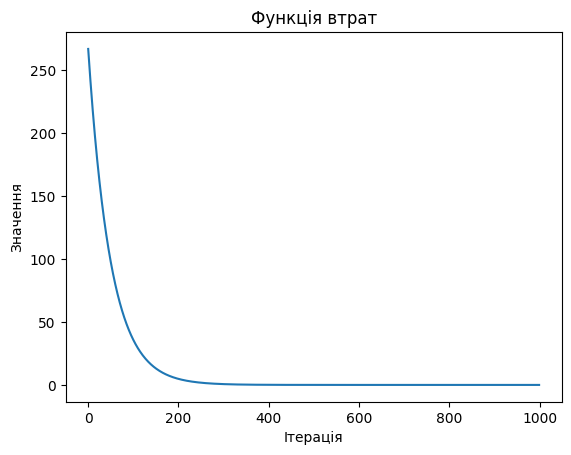

In [286]:
plt.plot(loss_history)
plt.title('Функція втрат')
plt.xlabel('Ітерація')
plt.ylabel('Значення')
plt.show()

# Знайдіть ці ж параметри за допомогою аналітичного рішення

In [287]:
# Нормалізація вектора відповідей
y_norm = (y - y.mean()) / y.std()

# Обчислення аналітичного рішення
w_analytical = np.linalg.inv(X_norm.T @ X_norm) @ X_norm.T @ y_norm

# Вивід кращих параметрів
print(f"Кращі параметри: {w_analytical.flatten()}")

Кращі параметри: [6.82595372e-16 4.39452085e-01 1.60528660e-01 3.72344423e-01]


# Порівняйте отримані результати

In [288]:
# Обчислюємо передбачення лінійної регресії, навченої за допомогою градієнтного спуску
y_pred = hypothesis(X_norm, w)

# Обчислюємо передбачення лінійної регресії, знайденої за допомогою аналітичного рішення
y_pred_analytical = hypothesis(X_norm, w_analytical)

# Обчислюємо середньоквадратичну помилку для лінійної регресії, навченої за допомогою градієнтного спуску
mse = np.mean((y_norm - y_pred)**2)

# Обчислюємо середньоквадратичну помилку для лінійної регресії, знайденої за допомогою аналітичного рішення
mse_analytical = np.mean((y_norm - y_pred_analytical)**2)

print("Середньоквадратична помилка для лінійної регресії, навченої за допомогою градієнтного спуску: ", mse)
print("Середньоквадратична помилка для лінійної регресії, знайденої за допомогою аналітичного рішення: ", mse_analytical)

Середньоквадратична помилка для лінійної регресії, навченої за допомогою градієнтного спуску:  1.8637566029883806e-09
Середньоквадратична помилка для лінійної регресії, знайденої за допомогою аналітичного рішення:  0.5129169332941236
